<a href="https://colab.research.google.com/github/JAXMES/Artificial-Intelligence/blob/main/Week_3_4_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

url = "https://raw.githubusercontent.com/empathy87/The-Elements-of-Statistical-Learning-Python-Notebooks/master/data/mixture.txt"
# Open the url in web brower and learn its raw format



# Load to Python as a data frame
raw_data = pd.read_csv(url, sep=',')

# Display first 5 rows
raw_data.head()

,x1,x2,y
0,2.526093,0.321050,0
1,0.366954,0.031462,0
2,0.768219,0.717486,0
3,0.693436,0.777194,0
4,-0.019837,0.867254,0


In [ ]:
# Show the data type of each column
raw_data.dtypes

x1    float64
x2    float64
y       int64
dtype: object

In [ ]:
# kNN model (1)

model_1nn = KNeighborsClassifier(n_neighbors=1)
model_1nn.fit(raw_data[['x1', 'x2']], raw_data['y'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
# How to evaluate the kNN model?

# Visualize the decision region.

# 1. create a 100 * 100 grid of points to cover the entire plane.
input_cols = ['x1', 'x2']

plot_data = pd.DataFrame()
x1_coordinates = np.linspace(-3, 4, 100) # sample 100 points per row
x2_coordinates = np.linspace(-2, 3, 100) # sample 100 rows (total: 100 * 100 = 10,000 points)
for x1 in x1_coordinates:
    for x2 in x2_coordinates:
        plot_data = plot_data.append({'x1': x1,
                               'x2': x2},
                              ignore_index=True)
plot_data

# 2. use the kNN model to make a prediction on each of the 10,000 points.
plot_data['prediction'] = model_1nn.predict(plot_data[input_cols])
plot_data.head()

,x1,x2,prediction
0,-3.0,-2.000000,0
1,-3.0,-1.949495,0
2,-3.0,-1.898990,0
3,-3.0,-1.848485,0
4,-3.0,-1.797980,0


Text(0, 0.5, 'x2')

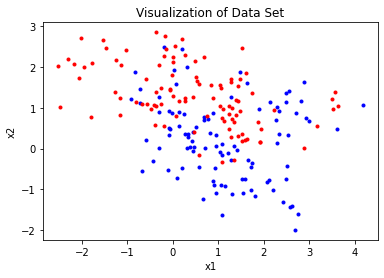

In [ ]:
blue_pts = raw_data[raw_data['y'] == 0]
red_pts = raw_data[raw_data['y'] == 1]
plt.plot(blue_pts['x1'], blue_pts['x2'], 'b.', label='y = 0')
plt.plot(red_pts['x1'], red_pts['x2'], 'r.', label='y = 1')
plt.title('Visualization of Data Set')
plt.xlabel('x1')
plt.ylabel('x2')

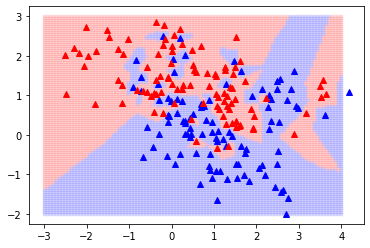

In [ ]:
#   points classified as 1 should be visualized as red points.

test_data_blue = plot_data[plot_data['prediction'] == 0]
test_data_red = plot_data[plot_data['prediction'] == 1]
plt.plot(test_data_blue['x1'], test_data_blue['x2'], 'b.', alpha=0.1)
plt.plot(test_data_red['x1'], test_data_red['x2'], 'r.', alpha=0.1)
plt.plot(blue_pts['x1'], blue_pts['x2'], 'b^', label='y = 0')
plt.plot(red_pts['x1'], red_pts['x2'], 'r^', label='y = 1')

In [ ]:
# Calculate the accuracy score on the test set.

# Split the dataset into training set and test set.
# Set the size of test set to be 20%.

# train_test_split

training_data, test_data = train_test_split(raw_data, test_size=0.2)

model_1nn_2 = KNeighborsClassifier(n_neighbors=1)
model_1nn_2.fit(training_data[input_cols], training_data['y'])

test_data['prediction'] = model_1nn_2.predict(test_data[input_cols])
test_data.head()

accuracy_score(test_data['y'], test_data['prediction'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


0.725

In [ ]:
# ***** PART II ***** KNN (5)

In [ ]:
# kNN model (5) PART II
from sklearn.neighbors import KNeighborsClassifier

model_5nn = KNeighborsClassifier(n_neighbors=5)
model_5nn.fit(raw_data[['x1', 'x2']], raw_data['y'])

test_data['prediction'] = model_5nn.predict(test_data[input_cols])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
plot_data['prediction'] = model_5nn.predict(plot_data[input_cols])
plot_data.head()

,x1,x2,prediction
0,-3.0,-2.000000,0
1,-3.0,-1.949495,0
2,-3.0,-1.898990,0
3,-3.0,-1.848485,0
4,-3.0,-1.797980,0


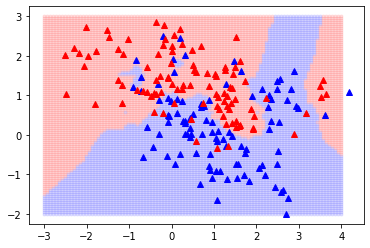

In [ ]:
test_data_blue = plot_data[plot_data['prediction'] == 0]
test_data_red = plot_data[plot_data['prediction'] == 1]
plt.plot(test_data_blue['x1'], test_data_blue['x2'], 'b.', alpha=0.1)
plt.plot(test_data_red['x1'], test_data_red['x2'], 'r.', alpha=0.1)
plt.plot(blue_pts['x1'], blue_pts['x2'], 'b^', label='y = 0')
plt.plot(red_pts['x1'], red_pts['x2'], 'r^', label='y = 1')

In [ ]:
# Calculate the accuracy score on the test set.

# Split the dataset into training set and test set.
# Set the size of test set to be 20%.

# train_test_split

training_data, test_data = train_test_split(raw_data, test_size=0.2)

model_5nn_2 = KNeighborsClassifier(n_neighbors=5)
model_5nn_2.fit(training_data[input_cols], training_data['y'])

test_data['prediction'] = model_5nn_2.predict(test_data[input_cols])
test_data.head()

accuracy_score(test_data['y'], test_data['prediction'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


0.775

In [ ]:
# ***** PART III ***** KNN (25)

In [ ]:
# kNN model (25) PART III
from sklearn.neighbors import KNeighborsClassifier

model_25nn = KNeighborsClassifier(n_neighbors=25)
model_25nn.fit(raw_data[['x1', 'x2']], raw_data['y'])

test_data['prediction'] = model_25nn.predict(test_data[input_cols])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
plot_data['prediction'] = model_25nn.predict(plot_data[input_cols])
plot_data.head()

,x1,x2,prediction
0,-3.0,-2.000000,0
1,-3.0,-1.949495,0
2,-3.0,-1.898990,0
3,-3.0,-1.848485,0
4,-3.0,-1.797980,0


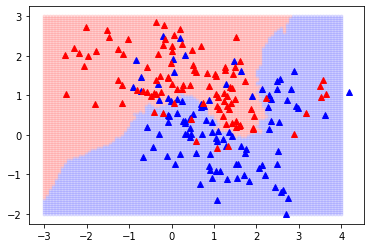

In [ ]:
test_data_blue = plot_data[plot_data['prediction'] == 0]
test_data_red = plot_data[plot_data['prediction'] == 1]
plt.plot(test_data_blue['x1'], test_data_blue['x2'], 'b.', alpha=0.1)
plt.plot(test_data_red['x1'], test_data_red['x2'], 'r.', alpha=0.1)
plt.plot(blue_pts['x1'], blue_pts['x2'], 'b^', label='y = 0')
plt.plot(red_pts['x1'], red_pts['x2'], 'r^', label='y = 1')

In [ ]:
# Calculate the accuracy score on the test set.

# Split the dataset into training set and test set.
# Set the size of test set to be 20%.

# train_test_split

training_data, test_data = train_test_split(raw_data, test_size=0.2)

model_25nn_2 = KNeighborsClassifier(n_neighbors=25)
model_25nn_2.fit(training_data[input_cols], training_data['y'])

test_data['prediction'] = model_25nn_2.predict(test_data[input_cols])
test_data.head()

accuracy_score(test_data['y'], test_data['prediction'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


0.825